In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.collections import LineCollection
#font = {'size':14}
#plt.rc('font',**font)

In [2]:
df = pd.read_csv('c20-combined.csv')

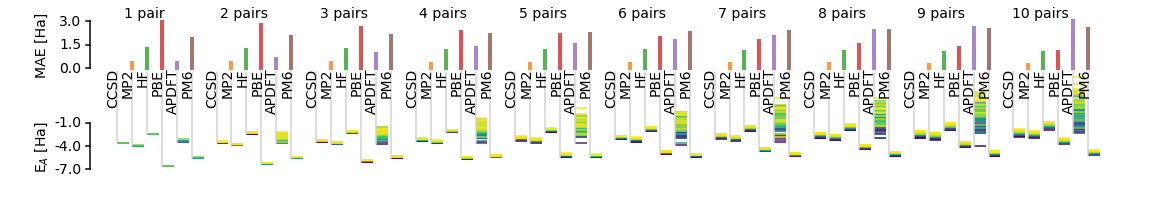

In [113]:
def do_figure():
    fig = plt.figure(figsize=(20,3))
    barwidth = 0.15
    
    
    cmap = matplotlib.cm.get_cmap('viridis')
    ax1 = fig.add_subplot(1, 1, 1)
    for bnpairs in sorted(df.bnpairs.unique()):
        s = df.query('bnpairs == @bnpairs').copy().sort_values('CCSD_A')
        
        for colidx, col in enumerate('CCSD MP2 HF PBE APDFT1 PM6'.split()):
            left = bnpairs + colidx * barwidth
            right = bnpairs + (colidx + 1) * barwidth
            center = (left+right)/2
            
            q = s['%s_A' % col].values
            xs = np.vstack((q*0+center, q*0+center+barwidth*0.8)).T.reshape(-1)
            ys = q.repeat(2)
            lines = np.vstack((xs, ys)).T.reshape(-1, 2, 2)
            fractional_rank = np.array(range(len(lines))) / len(lines)
            lc = LineCollection(lines, colors=[cmap(_) for _ in fractional_rank])
            ax1.add_collection(lc)
            
            mae = abs(q - s.CCSD_A.values).mean()
            #print (col, mae, bnpairs)
            ax1.plot((center, center), (min(ys), 5.5), color='lightgray')
            ax1.plot((center, center),  (6, 6+mae*2), color='C%d' % colidx, lw=4, alpha=0.8)
            ax1.annotate(col.strip('1'), (center+0.03, 6), ha="right", va="top", rotation=90)
    
        plural = ''
        if bnpairs > 1:
            plural = 's'
        ax1.annotate('%d pair%s' % (bnpairs, plural), (bnpairs+0.35, 13), ha="center", va="center" )
    
    # lower scale
    scalex = 0.8
    tw = 0.04
    plt.plot((scalex, scalex), (-7, -1), color='black')
    for tpos in (-7, -4, -1):
        plt.plot((scalex-tw, scalex), (tpos, tpos), color='black')
        plt.annotate('%3.1f' % tpos, (scalex-2*tw, tpos), ha="right", va="center")
    plt.annotate('E$_A$ [Ha]', (scalex*0.4, -4), ha="center", va="center", rotation=90)
    
    # upper scale
    scalex = 0.8
    tw = 0.04
    plt.plot((scalex, scalex), (6, 12), color='black')
    for tpos in (0, 1.5, 3):
        plt.plot((scalex-tw, scalex), (6+tpos*2, 6+tpos*2), color='black')
        plt.annotate('%3.1f' % tpos, (scalex-2*tw, 6+tpos*2), ha="right", va="center")
    plt.annotate('MAE [Ha]', (scalex*0.4, 6+1.5*2), ha="center", va="center", rotation=90)
    
    ax1.axis('off')
    plt.savefig('orderingc20.pdf', bbox_inches='tight')
    return
do_figure()

In [6]:
timings = {'PM6': 8.795861469204011,
 'APDFT': 0.8680163286834256,
 'PBE': 19767.953863523882,
 'CCSD': 721309.150688299,
 'HF': 117647.87672074728,
 'MP2': 356868.16310226155}

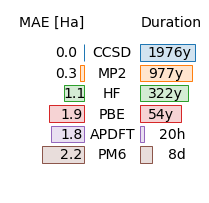

In [112]:
def do_figure():
    f = plt.figure(figsize=(3,3))
    maes = []
    gap = 15
    methods  = 'CCSD MP2 HF PBE APDFT PM6'.split()
    for midx, method in enumerate(methods):
        if method == 'APDFT':
            method = 'APDFT1'
        maes.append((df['%s_A' % method] - df.CCSD_A).abs().mean())
        plt.annotate(method.strip('1'), (gap/2, -midx), ha="center", va="center")
        pos = -0.5
        if midx < 2:
            pos =-2
        if midx == 2:
            pos = 0.5
        plt.annotate('%1.1f' % maes[-1], (pos, -midx), ha="right", va="center")
        
        pos = 27
        t = timings[method.strip('1')]
        #if method != 'APDFT1':
        #%    fmt = '%d'
        #%else:
        #    pos = 18
        #    fmt = '%1.1f'
        fmt = '%dd'
        ha='right'
        if t < 1:
            t *= 24
            fmt = '%dh'
        if t > 365:
            t /= 365
            fmt = '%dy'
            ha='left'
            pos=17
        plt.annotate(fmt % t, (pos, -midx), ha=ha, va="center")
    maes= np.array(maes)
    xs = np.array(range(len(methods)))
    ys = [np.log(timings[_])+1 for _ in methods]
    #ys = [timings[_]/40000 for _ in methods]
    plt.barh(-xs, ys, left=gap,color=['C%d' % _ for _ in xs], alpha=0.2)
    plt.barh(-xs, ys, left=gap, edgecolor=['C%d' % _ for _ in xs], facecolor='none')
    
    plt.barh(-xs, -maes*5, color=['C%d' % _ for _ in xs], alpha=0.2)
    plt.barh(-xs, -maes*5, edgecolor=['C%d' % _ for _ in xs], facecolor='none')
    
    plt.annotate('MAE [Ha]', (0, 1.5), ha="right", va="center")
    plt.annotate('Duration', (gap, 1.5), ha="left", va="center")
    plt.ylim(-6, 2)
    plt.axis('off')
    plt.savefig('costc20.pdf', bbox_inches='tight')
do_figure()

In [115]:
df.query('bnpairs==6')

,Unnamed: 0,PBE_T,pbe_time,target,CCSD_T,HF_T,MP2_T,ccsd_time,hf_time,mp2_time,...,APDFT1_T,bnpairs,PBE_A,CCSD_A,HF_A,MP2_A,PM6_A,APDFT0_A,APDFT1_A,deltaE
502,502,-121.473000,12.595167,76567766576766555765,-778.441909,-776.613020,-778.445801,15.466667,2.716667,7.150000,...,-764.080865,6,-4.766410,-2.842096,-1.763327,-3.111036,-5.105695,4.698329,-0.508950,2.333146
503,503,-121.565440,9.534867,75656766677675755656,-778.540062,-776.704754,-778.560379,16.766667,2.750000,9.016667,...,-765.536799,6,-4.858850,-2.940249,-1.855061,-3.225614,-5.152871,3.915101,-1.964883,0.975366
504,504,-121.558781,7.501183,65767576655756666577,-778.555242,-776.754957,-778.516236,16.450000,2.550000,6.983333,...,-765.441783,6,-4.852191,-2.955429,-1.905264,-3.181472,-5.213372,3.879710,-1.869867,1.085562
505,505,-121.434311,7.982200,66755657765665576677,-778.321238,-776.478901,-778.303991,21.883333,3.350000,7.916667,...,-763.159507,6,-4.727721,-2.721426,-1.629208,-2.969226,-5.105901,5.349454,0.412408,3.133834
506,506,-121.564615,7.389033,66557666677576575567,-778.562347,-776.748665,-778.541216,14.950000,2.666667,7.516667,...,-764.630434,6,-4.858024,-2.962534,-1.898972,-3.206451,-5.169319,3.754468,-1.058519,1.904016
507,507,-121.668914,6.069233,57676666765576557657,-778.673180,-776.849861,-778.667635,17.800000,2.750000,8.483333,...,-766.411609,6,-4.962324,-3.073368,-2.000168,-3.332870,-5.282526,3.411669,-2.839694,0.233674
508,508,-121.516215,5.258117,56775665656576576767,-778.496685,-776.671532,-778.488415,15.183333,2.716667,7.300000,...,-765.410103,6,-4.809625,-2.896872,-1.821839,-3.153651,-5.112941,4.262621,-1.838188,1.058684
509,509,-121.455765,7.172567,55667655766567775766,-778.404115,-776.586142,-778.368780,18.250000,2.766667,7.450000,...,-765.635955,6,-4.749175,-2.804303,-1.736449,-3.034015,-5.077727,4.616632,-2.064040,0.740263
510,510,-121.387481,6.496817,67656577666655576757,-778.354678,-776.547197,-778.342152,15.983333,2.816667,8.200000,...,-764.061200,6,-4.680890,-2.754865,-1.697503,-3.007388,-5.050009,5.690807,-0.489284,2.265581
511,511,-121.493648,6.930250,57757576765557666666,-778.473179,-776.636329,-778.490814,18.833333,2.750000,12.050000,...,-764.510888,6,-4.787058,-2.873367,-1.786636,-3.156049,-5.114939,4.310747,-0.938972,1.934394


In [3]:
error = df.

,Unnamed: 0,PBE_T,pbe_time,target,CCSD_T,HF_T,MP2_T,ccsd_time,hf_time,mp2_time,...,APDFT1_T,bnpairs,PBE_A,CCSD_A,HF_A,MP2_A,PM6_A,APDFT0_A,APDFT1_A,deltaE
0,0,-114.440595,15.995800,56666666666666766666,-761.490286,-759.560913,-761.534797,16.283333,2.650000,7.050000,...,-759.337617,1,-6.590611,-3.643445,-2.455347,-3.958609,-5.534035,-2.460500,-3.495425,0.148020
1,1,-114.440157,9.555567,76666666666666666665,-761.490502,-759.559735,-761.531058,17.416667,2.816667,8.333333,...,-759.170945,1,-6.590174,-3.643661,-2.454169,-3.954870,-5.537884,-2.373038,-3.328753,0.314908
2,2,-114.415354,16.224300,56666666666666667666,-761.463852,-759.532753,-761.501104,11.500000,2.433333,6.600000,...,-758.953373,1,-6.565371,-3.617011,-2.427187,-3.924917,-5.464151,-2.356222,-3.111181,0.505830
3,3,-114.436452,15.340100,56666666666666666766,-761.488091,-759.558745,-761.529295,14.050000,2.583333,8.066667,...,-759.155159,1,-6.586469,-3.641250,-2.453179,-3.953108,-5.534977,-2.376742,-3.312968,0.328282
4,4,-114.467449,5.941517,56666766666666666666,-761.523765,-759.592814,-761.576147,13.200000,2.550000,7.016667,...,-759.353318,1,-6.617466,-3.676924,-2.487248,-3.999960,-5.559609,-2.583811,-3.511127,0.165797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,896,-125.737130,16.332000,55557577567765575777,-788.680171,-786.943650,-788.625197,18.616667,2.900000,7.550000,...,-766.507273,9,-3.716575,-2.428576,-1.447481,-2.635286,-4.880264,8.618217,1.702477,4.131052
897,897,-125.709612,25.460200,55556775777767755755,-788.669582,-786.930073,-788.616434,15.683333,2.683333,6.466667,...,-769.511582,9,-3.689058,-2.417987,-1.433904,-2.626523,-4.817611,8.428029,-1.301832,1.116155
898,898,-125.688745,12.295533,55557577667775555777,-788.631900,-786.900835,-788.568952,15.566667,2.666667,6.783333,...,-765.840491,9,-3.668190,-2.380304,-1.404666,-2.579041,-4.813935,8.515662,2.369259,4.749563
899,899,-125.977547,7.052267,55557756575776757577,-788.970248,-787.259725,-788.909320,16.416667,2.583333,6.833333,...,-767.547415,9,-3.956993,-2.718653,-1.763556,-2.919409,-5.108513,7.973645,0.662334,3.380987
